# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

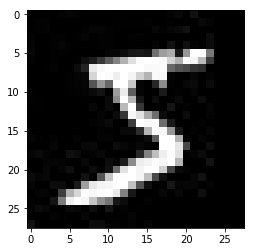

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:3], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

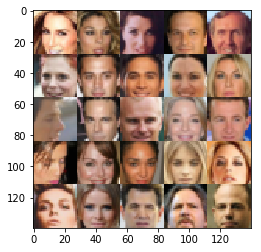

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\Mike Lee\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: No GPU found. Please use a GPU to train your neural network.
  # This is added back by InteractiveShellApp.init_path()


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_ = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels),"inpus")
    input_z = tf.placeholder(tf.float32, (None,z_dim),"z_input")
    learning_rate = tf.placeholder(tf.float32)
    return input_, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):

        """
        Create the discriminator network
        :param images: Tensor of input image(s)
        :param reuse: Boolean if the weights should be reused
        :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
        """
        #28x28x3
        z1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2 * z1, z1)
        #14x14x6
        z2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(z2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        #7x7x12
        z3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(z3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

    # TODO: Implement Function

    return (output, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    with tf.variable_scope('generator', reuse=not(is_train)):
        z1 = tf.layers.dense(z, 7*7*128)
        z1 = tf.reshape(z1,(-1,7,7,128))
        bn1 = tf.layers.batch_normalization(z1, training=is_train)
        relu1 = tf.maximum(0.2*bn1,bn1)
        
        z2 = tf.layers.conv2d_transpose(relu1, 64,3,strides = 2, padding = 'same')
        bn2 = tf.layers.batch_normalization(z2, training=is_train)
        relu2 = tf.maximum(0.2*bn2,bn2)
               
        logits = tf.layers.conv2d_transpose(relu2, out_channel_dim, 5,strides = 2, padding = 'same')
        output = tf.tanh(logits)

  
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real , d_logits_real = discriminator(input_real)
    d_model_fake , d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(*data_shape[1:],z_dim) #z_dimension
    d_loss, g_loss  = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images*=2
                steps += 1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr : learning_rate})
                sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr : learning_rate})
                
                if steps % 20 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % 100 == 0:

                    gen_sample = show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)


            

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5042... Generator Loss: 2.3670
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.5977
Epoch 1/2... Discriminator Loss: 1.4398... Generator Loss: 0.3740
Epoch 1/2... Discriminator Loss: 1.2258... Generator Loss: 0.8729
Epoch 1/2... Discriminator Loss: 1.0832... Generator Loss: 1.2819


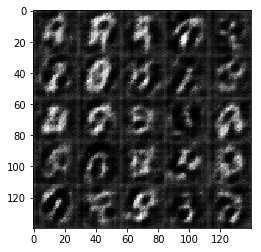

Epoch 1/2... Discriminator Loss: 1.2498... Generator Loss: 0.9048
Epoch 1/2... Discriminator Loss: 1.2948... Generator Loss: 0.4951
Epoch 1/2... Discriminator Loss: 1.2893... Generator Loss: 1.3528
Epoch 1/2... Discriminator Loss: 1.5265... Generator Loss: 2.1443
Epoch 1/2... Discriminator Loss: 1.1110... Generator Loss: 1.8831


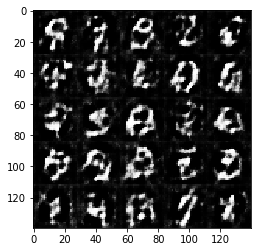

Epoch 1/2... Discriminator Loss: 1.1687... Generator Loss: 0.7268
Epoch 1/2... Discriminator Loss: 1.9400... Generator Loss: 0.2046
Epoch 1/2... Discriminator Loss: 1.2003... Generator Loss: 0.4810
Epoch 1/2... Discriminator Loss: 1.0957... Generator Loss: 0.6572
Epoch 1/2... Discriminator Loss: 0.7893... Generator Loss: 1.2946


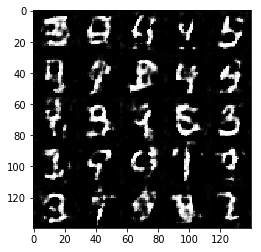

Epoch 1/2... Discriminator Loss: 1.2774... Generator Loss: 0.4973
Epoch 1/2... Discriminator Loss: 1.8636... Generator Loss: 0.2654
Epoch 1/2... Discriminator Loss: 1.6038... Generator Loss: 0.3504
Epoch 1/2... Discriminator Loss: 0.9711... Generator Loss: 0.9212
Epoch 1/2... Discriminator Loss: 1.1016... Generator Loss: 1.6038


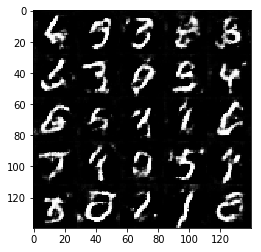

Epoch 1/2... Discriminator Loss: 0.5407... Generator Loss: 1.8028
Epoch 1/2... Discriminator Loss: 1.5103... Generator Loss: 0.3737
Epoch 1/2... Discriminator Loss: 0.8039... Generator Loss: 1.1005
Epoch 1/2... Discriminator Loss: 0.7207... Generator Loss: 1.7766
Epoch 1/2... Discriminator Loss: 0.9597... Generator Loss: 0.7342


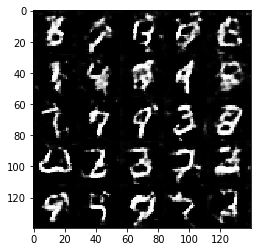

Epoch 1/2... Discriminator Loss: 0.8077... Generator Loss: 0.9138
Epoch 1/2... Discriminator Loss: 0.8985... Generator Loss: 1.5379
Epoch 1/2... Discriminator Loss: 1.2035... Generator Loss: 0.7203
Epoch 1/2... Discriminator Loss: 1.3291... Generator Loss: 0.5861
Epoch 1/2... Discriminator Loss: 0.7366... Generator Loss: 1.2340


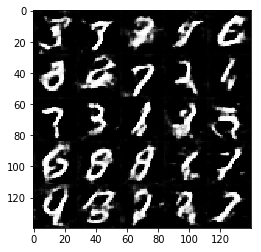

Epoch 1/2... Discriminator Loss: 1.3772... Generator Loss: 2.6419
Epoch 1/2... Discriminator Loss: 1.0652... Generator Loss: 0.8247
Epoch 1/2... Discriminator Loss: 0.9806... Generator Loss: 1.1458
Epoch 1/2... Discriminator Loss: 1.5821... Generator Loss: 0.3417
Epoch 1/2... Discriminator Loss: 0.8623... Generator Loss: 1.5838


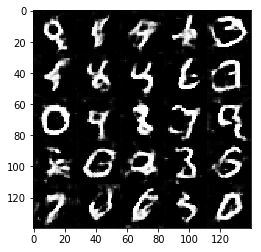

Epoch 1/2... Discriminator Loss: 1.0504... Generator Loss: 0.7110
Epoch 1/2... Discriminator Loss: 0.6712... Generator Loss: 1.8047
Epoch 1/2... Discriminator Loss: 0.7195... Generator Loss: 1.4851
Epoch 1/2... Discriminator Loss: 1.6340... Generator Loss: 0.3364
Epoch 1/2... Discriminator Loss: 0.7092... Generator Loss: 1.0858


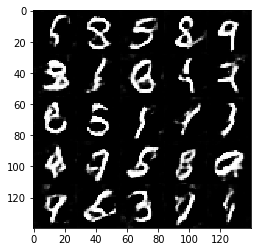

Epoch 1/2... Discriminator Loss: 0.7271... Generator Loss: 1.1168
Epoch 1/2... Discriminator Loss: 1.6606... Generator Loss: 0.4511
Epoch 1/2... Discriminator Loss: 1.9148... Generator Loss: 0.4242
Epoch 1/2... Discriminator Loss: 0.8538... Generator Loss: 0.9819
Epoch 1/2... Discriminator Loss: 0.6650... Generator Loss: 1.5569


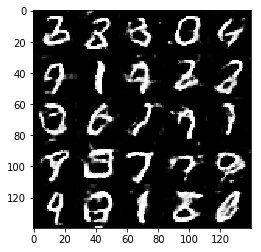

Epoch 1/2... Discriminator Loss: 0.7139... Generator Loss: 1.6051
Epoch 2/2... Discriminator Loss: 1.7932... Generator Loss: 0.3793
Epoch 2/2... Discriminator Loss: 0.7674... Generator Loss: 0.9606
Epoch 2/2... Discriminator Loss: 0.7160... Generator Loss: 1.8831
Epoch 2/2... Discriminator Loss: 1.3767... Generator Loss: 2.1708


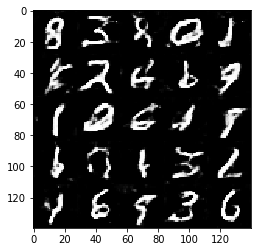

Epoch 2/2... Discriminator Loss: 0.6390... Generator Loss: 1.2899
Epoch 2/2... Discriminator Loss: 0.9049... Generator Loss: 0.9357
Epoch 2/2... Discriminator Loss: 3.7571... Generator Loss: 0.0875
Epoch 2/2... Discriminator Loss: 1.3052... Generator Loss: 0.5069
Epoch 2/2... Discriminator Loss: 1.0075... Generator Loss: 0.7332


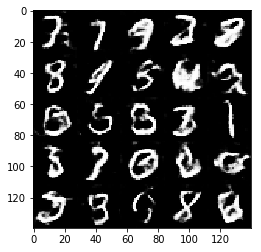

Epoch 2/2... Discriminator Loss: 0.8295... Generator Loss: 0.8981
Epoch 2/2... Discriminator Loss: 0.6699... Generator Loss: 2.4390
Epoch 2/2... Discriminator Loss: 1.8446... Generator Loss: 0.3343
Epoch 2/2... Discriminator Loss: 0.9023... Generator Loss: 0.8669
Epoch 2/2... Discriminator Loss: 1.0476... Generator Loss: 0.7490


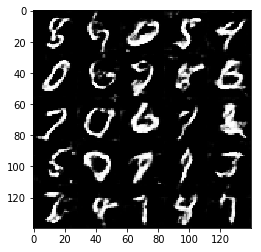

Epoch 2/2... Discriminator Loss: 0.4359... Generator Loss: 1.6506
Epoch 2/2... Discriminator Loss: 2.2416... Generator Loss: 0.3717
Epoch 2/2... Discriminator Loss: 0.5410... Generator Loss: 2.0537
Epoch 2/2... Discriminator Loss: 0.9616... Generator Loss: 0.7518
Epoch 2/2... Discriminator Loss: 1.0853... Generator Loss: 3.3716


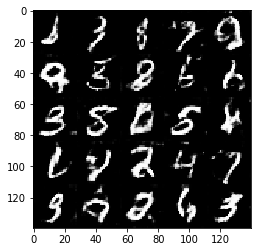

Epoch 2/2... Discriminator Loss: 1.1117... Generator Loss: 1.0183
Epoch 2/2... Discriminator Loss: 0.8020... Generator Loss: 0.9280
Epoch 2/2... Discriminator Loss: 2.1346... Generator Loss: 0.2668
Epoch 2/2... Discriminator Loss: 0.6458... Generator Loss: 1.7511
Epoch 2/2... Discriminator Loss: 2.3218... Generator Loss: 4.5495


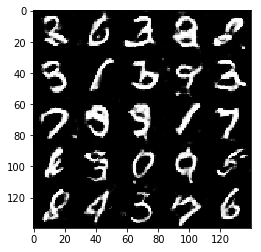

Epoch 2/2... Discriminator Loss: 0.5417... Generator Loss: 1.6772
Epoch 2/2... Discriminator Loss: 0.5030... Generator Loss: 1.4339
Epoch 2/2... Discriminator Loss: 0.6635... Generator Loss: 1.3134
Epoch 2/2... Discriminator Loss: 0.8994... Generator Loss: 0.9028
Epoch 2/2... Discriminator Loss: 0.4016... Generator Loss: 2.4566


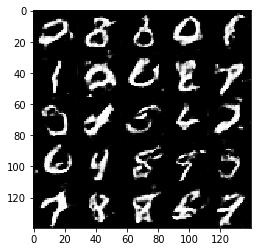

Epoch 2/2... Discriminator Loss: 0.8667... Generator Loss: 0.7461
Epoch 2/2... Discriminator Loss: 0.7456... Generator Loss: 1.0135
Epoch 2/2... Discriminator Loss: 0.4696... Generator Loss: 1.4790
Epoch 2/2... Discriminator Loss: 0.7339... Generator Loss: 1.1555
Epoch 2/2... Discriminator Loss: 0.8625... Generator Loss: 2.5600


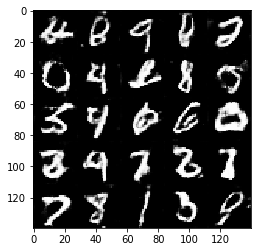

Epoch 2/2... Discriminator Loss: 1.1084... Generator Loss: 0.7352
Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 1.1830
Epoch 2/2... Discriminator Loss: 0.8241... Generator Loss: 1.0000
Epoch 2/2... Discriminator Loss: 0.6709... Generator Loss: 1.0634
Epoch 2/2... Discriminator Loss: 2.1040... Generator Loss: 0.2889


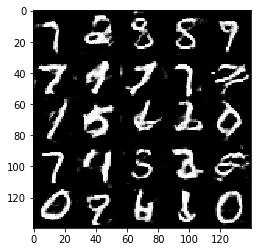

Epoch 2/2... Discriminator Loss: 1.2061... Generator Loss: 0.6104
Epoch 2/2... Discriminator Loss: 0.6475... Generator Loss: 1.4073
Epoch 2/2... Discriminator Loss: 0.4127... Generator Loss: 2.0134
Epoch 2/2... Discriminator Loss: 0.6386... Generator Loss: 1.2612
Epoch 2/2... Discriminator Loss: 1.4931... Generator Loss: 0.5895


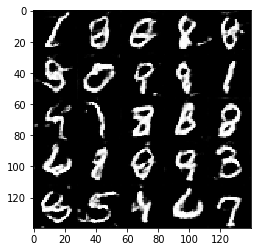

Epoch 2/2... Discriminator Loss: 0.8835... Generator Loss: 0.9512
Epoch 2/2... Discriminator Loss: 1.0059... Generator Loss: 0.8199
Epoch 2/2... Discriminator Loss: 0.5872... Generator Loss: 1.5289


In [12]:
batch_size  = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 0.8390... Generator Loss: 2.5919
Epoch 1/1... Discriminator Loss: 1.9749... Generator Loss: 3.4306
Epoch 1/1... Discriminator Loss: 0.4741... Generator Loss: 1.5900
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 1.1144


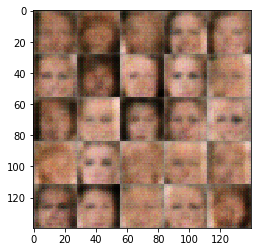

Epoch 1/1... Discriminator Loss: 0.6458... Generator Loss: 1.4583
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 1.3715
Epoch 1/1... Discriminator Loss: 2.3211... Generator Loss: 0.1725
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 2.3650
Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 1.0145


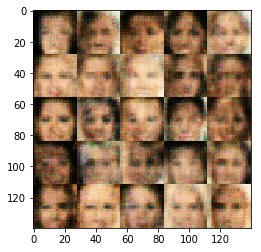

Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 1.2482
Epoch 1/1... Discriminator Loss: 1.8811... Generator Loss: 0.2236
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 1.4351
Epoch 1/1... Discriminator Loss: 1.6209... Generator Loss: 0.3256
Epoch 1/1... Discriminator Loss: 1.1272... Generator Loss: 1.4828


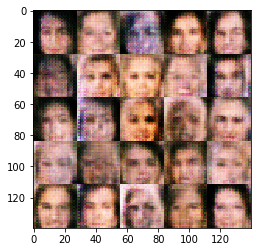

Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.7077
Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.9703
Epoch 1/1... Discriminator Loss: 1.0455... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 1.1263
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 1.8946


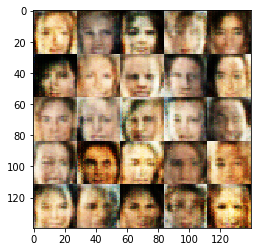

Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 1.1621
Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 0.5153
Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.9783
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 1.3125


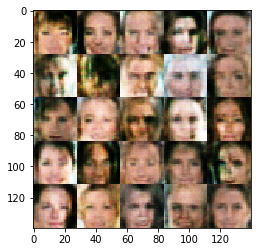

Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 0.9750... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 0.7106


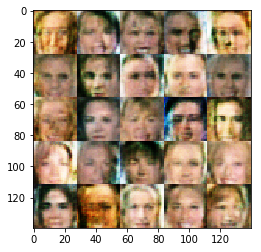

Epoch 1/1... Discriminator Loss: 1.1351... Generator Loss: 1.3311
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.6439
Epoch 1/1... Discriminator Loss: 1.4854... Generator Loss: 0.3778
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.5199
Epoch 1/1... Discriminator Loss: 1.3243... Generator Loss: 1.3012


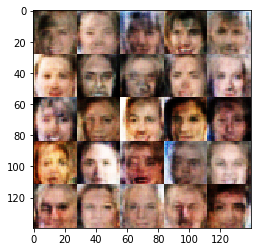

Epoch 1/1... Discriminator Loss: 0.9011... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.9085
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 1.1389
Epoch 1/1... Discriminator Loss: 1.0139... Generator Loss: 1.2215


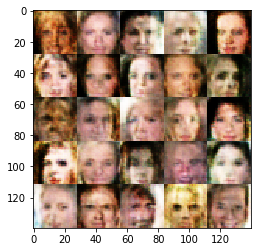

Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.4208
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.4962
Epoch 1/1... Discriminator Loss: 1.3069... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.5930... Generator Loss: 0.3125
Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.4081


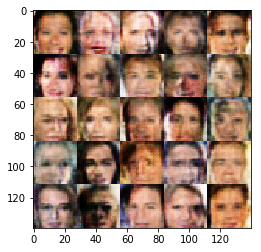

Epoch 1/1... Discriminator Loss: 1.6100... Generator Loss: 0.3196
Epoch 1/1... Discriminator Loss: 1.1526... Generator Loss: 1.2858
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 0.5949
Epoch 1/1... Discriminator Loss: 1.5650... Generator Loss: 0.3212
Epoch 1/1... Discriminator Loss: 1.0672... Generator Loss: 1.1090


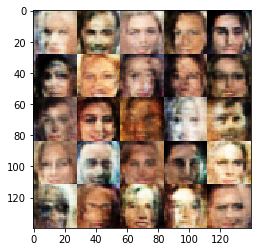

Epoch 1/1... Discriminator Loss: 1.2700... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.4479
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.7941... Generator Loss: 0.2704
Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 0.5274


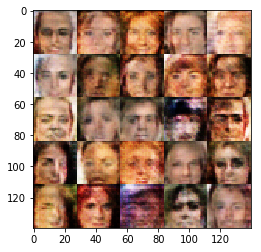

Epoch 1/1... Discriminator Loss: 1.0796... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 0.8975
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 1.0864
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 0.5146
Epoch 1/1... Discriminator Loss: 1.5460... Generator Loss: 0.3498


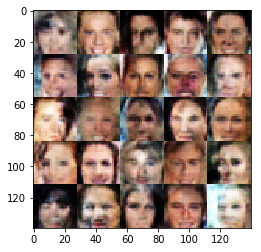

Epoch 1/1... Discriminator Loss: 1.6192... Generator Loss: 0.3142
Epoch 1/1... Discriminator Loss: 1.0912... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 1.3624
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.4124
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.7050


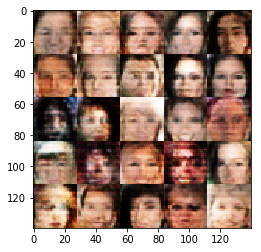

Epoch 1/1... Discriminator Loss: 1.5742... Generator Loss: 0.3098
Epoch 1/1... Discriminator Loss: 1.1031... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 1.2305
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 0.5136
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 0.7678


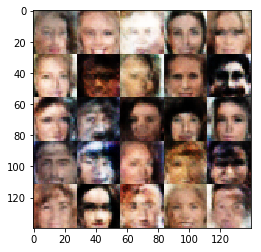

Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 0.9719... Generator Loss: 0.8133
Epoch 1/1... Discriminator Loss: 1.2198... Generator Loss: 0.4685
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 0.5234


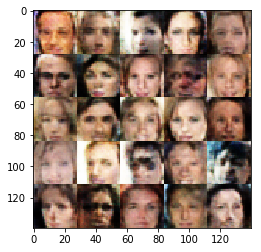

Epoch 1/1... Discriminator Loss: 0.9505... Generator Loss: 0.8844
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 1.1799
Epoch 1/1... Discriminator Loss: 1.0979... Generator Loss: 1.0698
Epoch 1/1... Discriminator Loss: 1.1009... Generator Loss: 0.6064
Epoch 1/1... Discriminator Loss: 0.9227... Generator Loss: 0.9814


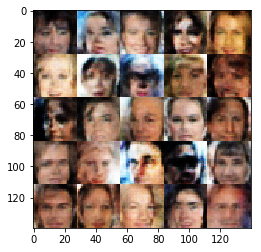

Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 1.1036
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.3709
Epoch 1/1... Discriminator Loss: 1.5598... Generator Loss: 0.3293
Epoch 1/1... Discriminator Loss: 1.1772... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.0917... Generator Loss: 0.5795


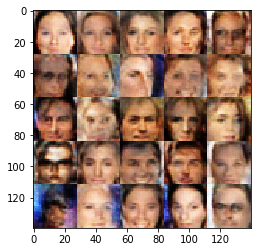

Epoch 1/1... Discriminator Loss: 0.8744... Generator Loss: 1.2196
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 2.1595
Epoch 1/1... Discriminator Loss: 0.7999... Generator Loss: 1.2348
Epoch 1/1... Discriminator Loss: 1.1027... Generator Loss: 0.8964
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 1.5313


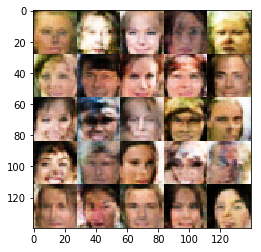

Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 0.8596
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 0.9187... Generator Loss: 0.7913
Epoch 1/1... Discriminator Loss: 1.6093... Generator Loss: 0.2858
Epoch 1/1... Discriminator Loss: 0.8629... Generator Loss: 1.2348


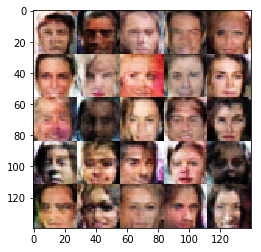

Epoch 1/1... Discriminator Loss: 1.0913... Generator Loss: 0.7567
Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 1.5408
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 1.5630
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 0.8610
Epoch 1/1... Discriminator Loss: 0.8586... Generator Loss: 0.8712


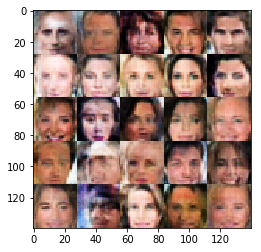

Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.3527
Epoch 1/1... Discriminator Loss: 1.0811... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 0.9073... Generator Loss: 1.1722
Epoch 1/1... Discriminator Loss: 1.1130... Generator Loss: 1.2568
Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 0.9969


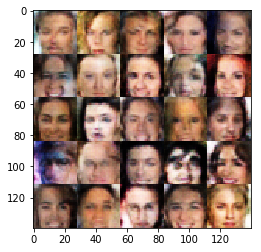

Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.3934
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.3753
Epoch 1/1... Discriminator Loss: 0.7866... Generator Loss: 1.0112
Epoch 1/1... Discriminator Loss: 0.9994... Generator Loss: 0.6812


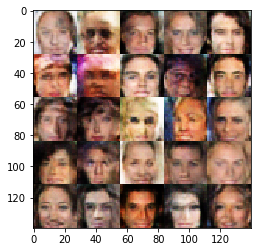

Epoch 1/1... Discriminator Loss: 0.8193... Generator Loss: 0.9597
Epoch 1/1... Discriminator Loss: 0.9120... Generator Loss: 1.0926
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.6215
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 2.6565


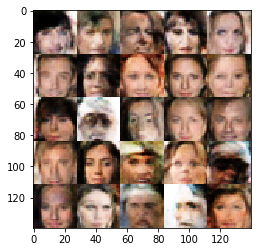

Epoch 1/1... Discriminator Loss: 1.0065... Generator Loss: 0.9487
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 1.0166... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 1.4328... Generator Loss: 0.3643
Epoch 1/1... Discriminator Loss: 1.0894... Generator Loss: 0.7472


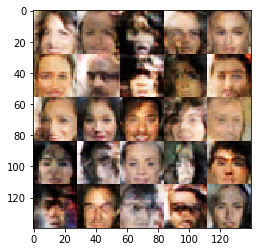

Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 0.7603... Generator Loss: 1.0381
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.4255
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 0.5294
Epoch 1/1... Discriminator Loss: 1.1354... Generator Loss: 0.5418


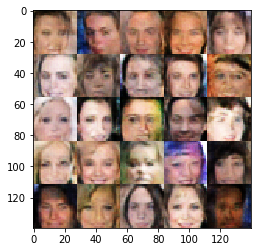

Epoch 1/1... Discriminator Loss: 0.9395... Generator Loss: 1.0015
Epoch 1/1... Discriminator Loss: 0.8727... Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 0.9914... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.4377


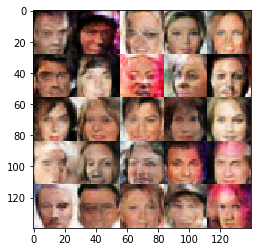

Epoch 1/1... Discriminator Loss: 1.1162... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 1.0249
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 1.1402... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 0.5201


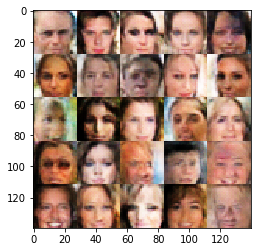

Epoch 1/1... Discriminator Loss: 1.2052... Generator Loss: 0.7711
Epoch 1/1... Discriminator Loss: 0.7650... Generator Loss: 0.9190
Epoch 1/1... Discriminator Loss: 0.8568... Generator Loss: 1.1370
Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 0.7744... Generator Loss: 1.5410


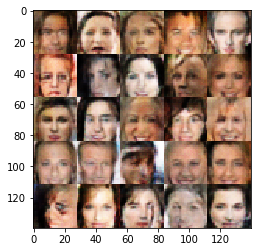

Epoch 1/1... Discriminator Loss: 0.9352... Generator Loss: 0.9594
Epoch 1/1... Discriminator Loss: 1.5172... Generator Loss: 0.3719
Epoch 1/1... Discriminator Loss: 0.8717... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.0964... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.4802... Generator Loss: 0.3343


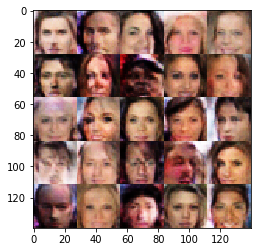

Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 2.5990
Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 0.5986
Epoch 1/1... Discriminator Loss: 0.7439... Generator Loss: 1.4195
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.3680
Epoch 1/1... Discriminator Loss: 1.1648... Generator Loss: 0.5517


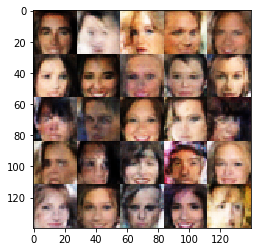

Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.4382
Epoch 1/1... Discriminator Loss: 1.7821... Generator Loss: 0.2461
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 0.6321
Epoch 1/1... Discriminator Loss: 0.9578... Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.3989


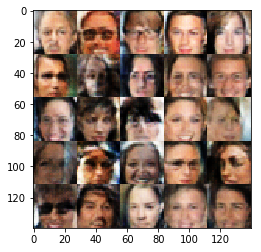

Epoch 1/1... Discriminator Loss: 1.1431... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 1.6769
Epoch 1/1... Discriminator Loss: 1.7164... Generator Loss: 0.2516


In [13]:
batch_size  = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.